In [2]:
import torch
from torch import tensor
import matplotlib.pyplot as plt

In [3]:
def my_sampler(size: int, dist: torch.Tensor, requires_grad = False) -> torch.Tensor:	
	assert type(dist) == torch.Tensor
	assert dist is not None
	assert dist.sum() == 1
	assert torch.all(dist > 0).item()

	dist = dist.cumsum(dim=0)

	print(dist)

	rand = torch.rand(size)
	res = torch.zeros(size)
	#print("rand", rand)

	low = 0

	for i in range(dist.numel()):
		high = dist[i]
		#print("low", low, "high", high)

		mask = (rand > low) & (rand <= high)
		res = res + mask * i
		
		# print("dist = ", dist[i])
		# print("mask = ", mask)
		# print("res = ", res)

		low = dist[i]

	res.requires_grad = requires_grad
	return res

In [4]:
dist = tensor([0.1, 0.2, 0.7])
res = my_sampler(100, dist)
res

tensor([0.1000, 0.3000, 1.0000])


tensor([2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
        2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 0., 2.,
        2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 2., 0., 1., 2., 2., 2., 0.,
        2., 2., 2., 2., 0., 2., 0., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 1., 0., 2., 1., 2., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 0., 2., 2., 1., 1.])

tensor([0.1000, 0.5000, 1.0000])


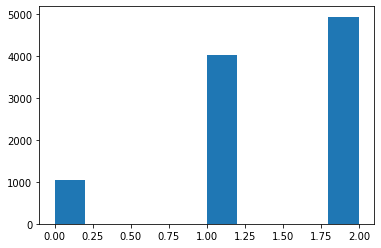

In [12]:
dist = tensor([0.1, 0.4, 0.5])
res = my_sampler(10000, dist)

res = res.detach().numpy()

# dist_count = torch.zeros(dist.numel(), dtype=torch.int)
# for i in range(dist.numel()):
# 	dist_count[i] = torch.sum(res == i)
# print(dist_count)

# plt.bar(range(dist.numel()), dist_count)

plt.hist(res)
plt.show()

In [6]:
res

array([2., 2., 0., ..., 2., 1., 2.], dtype=float32)